# Exploratory Data Analysis (EDA)

🔬 **Quick data exploration and profiling for tmux layout testing**

This notebook focuses on:
- Rapid data profiling and quality assessment
- Interactive data exploration
- Testing cross-window workflows
- Performance comparisons between tools

Perfect for testing the **Data window** and **REPL window** integration!

---

## 🚀 Quick Setup

In [1]:
# Fast imports for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
from pathlib import Path
import json
import warnings
warnings.filterwarnings('ignore')

# Quick settings
plt.style.use('default')
sns.set_palette("Set2")
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)

print("🔬 EDA Environment Ready!")
print(f"Working directory: {Path.cwd()}")

🔬 EDA Environment Ready!
Working directory: /home/farhad/learning/sales_analysis/notebooks


## 📁 File Discovery Test

Test data file discovery - simulating Data window workflow.

In [2]:
# Discover available data files (like Data window)
print("📂 Data File Discovery:")
print("=" * 30)

data_dir = Path('../data')
if data_dir.exists():
    print("📊 Available data files:")
    for file_path in data_dir.glob('*'):
        if file_path.is_file():
            size_mb = file_path.stat().st_size / (1024 * 1024)
            print(f"  📄 {file_path.name}: {size_mb:.2f} MB")
else:
    print("❌ Data directory not found")

# List by file type (simulating fd commands)
print("\n🔍 Files by type:")
file_types = {
    'CSV': list(data_dir.glob('*.csv')),
    'JSON': list(data_dir.glob('*.json')),
    'Parquet': list(data_dir.glob('*.parquet')),
    'Analysis Results': list(data_dir.glob('analysis_*.csv'))
}

for file_type, files in file_types.items():
    print(f"  {file_type}: {len(files)} files")
    for file in files[:3]:  # Show first 3
        print(f"    • {file.name}")

📂 Data File Discovery:
📊 Available data files:
  📄 products.json: 0.01 MB
  📄 additional_products.json: 0.02 MB
  📄 large_sales.csv: 3.46 MB
  📄 regions.parquet: 0.00 MB
  📄 sales.csv: 0.00 MB

🔍 Files by type:
  CSV: 2 files
    • large_sales.csv
    • sales.csv
  JSON: 2 files
    • products.json
    • additional_products.json
  Parquet: 1 files
    • regions.parquet
  Analysis Results: 0 files


## 📊 Quick Data Profiling

Rapid data profiling using pandas - test `quickload()` functionality.

In [3]:
# Quick data profiling function (like quickload in REPL)
def quick_profile(file_path, sample_size=None):
    """Quick data profiling - simulates quickload() function."""
    print(f"🔍 Quick Profile: {file_path}")
    print("-" * 40)
    
    try:
        # Load data based on file type
        if str(file_path).endswith('.csv'):
            df = pd.read_csv(file_path, nrows=sample_size)
        elif str(file_path).endswith('.parquet'):
            df = pd.read_parquet(file_path)
        else:
            print("❌ Unsupported file type")
            return None
        
        # Basic info
        print(f"📏 Shape: {df.shape}")
        print(f"💾 Memory: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        print(f"🏷️  Columns: {list(df.columns)}")
        print(f"🔢 Data types: {df.dtypes.value_counts().to_dict()}")
        
        # Data quality
        missing = df.isnull().sum().sum()
        duplicates = df.duplicated().sum()
        print(f"❓ Missing values: {missing}")
        print(f"🔁 Duplicates: {duplicates}")
        
        return df
        
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# Test with sales data
sales_df = quick_profile('../data/sales.csv')
if sales_df is not None:
    print("\n👀 First 3 rows:")
    print(sales_df.head(3))

🔍 Quick Profile: ../data/sales.csv
----------------------------------------
📏 Shape: (50, 10)
💾 Memory: 0.0 MB
🏷️  Columns: ['transaction_id', 'date', 'product_id', 'customer_id', 'quantity', 'unit_price', 'total_amount', 'region', 'sales_rep', 'channel']
🔢 Data types: {dtype('O'): 7, dtype('float64'): 2, dtype('int64'): 1}
❓ Missing values: 0
🔁 Duplicates: 0

👀 First 3 rows:
  transaction_id        date product_id customer_id  quantity  unit_price  \
0        TXN_001  2024-01-15    PRD_101   CUST_2847         2       29.99   
1        TXN_002  2024-01-15    PRD_205   CUST_1923         1      149.99   
2        TXN_003  2024-01-16    PRD_312   CUST_5671         3       19.99   

   total_amount region      sales_rep channel  
0         59.98  North  Alice Johnson  online  
1        149.99  South       Bob Chen  retail  
2         59.97   East    Carol Davis  online  


## 🔄 Performance Comparison

Compare loading methods - test DuckDB vs Pandas performance.

In [4]:
# Performance benchmark (simulating REPL quick tests)
import time

def benchmark_loading(file_path, iterations=3):
    """Benchmark different loading methods."""
    print(f"⚡ Performance Benchmark: {Path(file_path).name}")
    print("=" * 50)
    
    results = {}
    
    # Pandas loading
    pandas_times = []
    for i in range(iterations):
        start = time.time()
        df_pandas = pd.read_csv(file_path)
        pandas_times.append(time.time() - start)
    
    results['pandas'] = {
        'avg_time': np.mean(pandas_times),
        'rows': len(df_pandas),
        'memory_mb': df_pandas.memory_usage(deep=True).sum() / 1024**2
    }
    
    # DuckDB loading
    duckdb_times = []
    for i in range(iterations):
        conn = duckdb.connect()
        start = time.time()
        df_duckdb = conn.execute(f"SELECT * FROM read_csv_auto('{file_path}')").df()
        duckdb_times.append(time.time() - start)
        conn.close()
    
    results['duckdb'] = {
        'avg_time': np.mean(duckdb_times),
        'rows': len(df_duckdb),
        'memory_mb': df_duckdb.memory_usage(deep=True).sum() / 1024**2
    }
    
    # Results
    print(f"🐼 Pandas: {results['pandas']['avg_time']:.4f}s avg ({results['pandas']['rows']:,} rows)")
    print(f"🦆 DuckDB: {results['duckdb']['avg_time']:.4f}s avg ({results['duckdb']['rows']:,} rows)")
    
    speedup = results['pandas']['avg_time'] / results['duckdb']['avg_time']
    winner = 'DuckDB' if speedup > 1 else 'Pandas'
    print(f"🏆 Winner: {winner} ({speedup:.2f}x {'faster' if speedup > 1 else 'slower'})")
    
    return results

# Run benchmark
if Path('../data/sales.csv').exists():
    benchmark_results = benchmark_loading('../data/sales.csv')
else:
    print("❌ Sales CSV not found for benchmarking")

⚡ Performance Benchmark: sales.csv
🐼 Pandas: 0.0010s avg (50 rows)
🦆 DuckDB: 0.0056s avg (50 rows)
🏆 Winner: Pandas (0.18x slower)


## 📋 JSON Structure Exploration

Explore nested JSON structure - test complex data handling.

In [5]:
# JSON exploration (simulating Data window JSON preview)
def explore_json(file_path):
    """Explore JSON structure - like jsonprev() function."""
    print(f"📋 JSON Structure: {Path(file_path).name}")
    print("=" * 40)
    
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        def analyze_structure(obj, path="root", max_depth=3, current_depth=0):
            if current_depth > max_depth:
                return
            
            if isinstance(obj, dict):
                print(f"{'  ' * current_depth}📁 {path} (dict, {len(obj)} keys)")
                for key, value in list(obj.items())[:5]:  # First 5 keys
                    analyze_structure(value, f"{path}.{key}", max_depth, current_depth + 1)
                if len(obj) > 5:
                    print(f"{'  ' * (current_depth + 1)}... and {len(obj) - 5} more keys")
            
            elif isinstance(obj, list):
                print(f"{'  ' * current_depth}📊 {path} (list, {len(obj)} items)")
                if obj:
                    analyze_structure(obj[0], f"{path}[0]", max_depth, current_depth + 1)
            
            else:
                type_name = type(obj).__name__
                value_preview = str(obj)[:50] + "..." if len(str(obj)) > 50 else str(obj)
                print(f"{'  ' * current_depth}🏷️  {path} ({type_name}): {value_preview}")
        
        analyze_structure(data)
        
        # Summary stats
        file_size = Path(file_path).stat().st_size
        print(f"\n📊 JSON Summary:")
        print(f"  File size: {file_size / 1024:.1f} KB")
        print(f"  Root type: {type(data).__name__}")
        
        if isinstance(data, dict):
            print(f"  Top-level keys: {len(data)}")
        elif isinstance(data, list):
            print(f"  Array length: {len(data)}")
        
        return data
        
    except Exception as e:
        print(f"❌ Error reading JSON: {e}")
        return None

# Explore products JSON
if Path('../data/products.json').exists():
    products_data = explore_json('../data/products.json')
else:
    print("❌ Products JSON not found")

📋 JSON Structure: products.json
📁 root (dict, 3 keys)
  📁 root.catalog (dict, 3 keys)
    🏷️  root.catalog.version (str): 2.1
    🏷️  root.catalog.last_updated (str): 2024-01-15T10:30:00Z
    📊 root.catalog.categories (list, 3 items)
      📁 root.catalog.categories[0] (dict, 3 keys)
  📊 root.products (list, 5 items)
    📁 root.products[0] (dict, 14 keys)
      🏷️  root.products[0].product_id (str): PRD_101
      🏷️  root.products[0].name (str): Wireless Bluetooth Headphones
      🏷️  root.products[0].description (str): High-quality wireless headphones with noise cancel...
      🏷️  root.products[0].category (str): ELECTRONICS
      🏷️  root.products[0].price (float): 29.99
      ... and 9 more keys
  📁 root.metadata (dict, 6 keys)
    🏷️  root.metadata.total_products (int): 5
    🏷️  root.metadata.active_products (int): 5
    🏷️  root.metadata.total_categories (int): 3
    🏷️  root.metadata.currency (str): USD
    🏷️  root.metadata.last_inventory_update (str): 2024-01-15T08:15:00Z
    

## 🔢 Statistical Overview

Quick statistical analysis - test Data window statistics functions.

In [6]:
# Quick statistical overview (like quickstats() function)
def quick_stats(df, name="Dataset"):
    """Generate quick statistics overview."""
    print(f"📊 Quick Stats: {name}")
    print("=" * 40)
    
    # Numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print("🔢 Numeric Columns:")
        for col in numeric_cols:
            print(f"  {col}:")
            print(f"    Range: {df[col].min():.2f} to {df[col].max():.2f}")
            print(f"    Mean: {df[col].mean():.2f}")
            print(f"    Std: {df[col].std():.2f}")
            print(f"    Missing: {df[col].isnull().sum()}")
    
    # Categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        print("\n📝 Categorical Columns:")
        for col in cat_cols:
            unique_count = df[col].nunique()
            print(f"  {col}: {unique_count} unique values")
            if unique_count <= 10:  # Show values if not too many
                top_values = df[col].value_counts().head(3)
                print(f"    Top: {dict(top_values)}")
    
    return df.describe(include='all')

# Quick stats on sales data
if 'sales_df' in locals() and sales_df is not None:
    stats = quick_stats(sales_df, "Sales Data")
    print("\n📋 Full Description:")
    print(stats)

📊 Quick Stats: Sales Data
🔢 Numeric Columns:
  quantity:
    Range: 1.00 to 16.00
    Mean: 4.32
    Std: 3.88
    Missing: 0
  unit_price:
    Range: 9.99 to 299.99
    Mean: 96.59
    Std: 109.11
    Missing: 0
  total_amount:
    Range: 29.99 to 599.98
    Mean: 181.96
    Std: 144.81
    Missing: 0

📝 Categorical Columns:
  transaction_id: 50 unique values
  date: 25 unique values
  product_id: 5 unique values
    Top: {'PRD_101': np.int64(11), 'PRD_205': np.int64(10), 'PRD_312': np.int64(10)}
  customer_id: 50 unique values
  region: 4 unique values
    Top: {'North': np.int64(13), 'South': np.int64(13), 'East': np.int64(12)}
  sales_rep: 4 unique values
    Top: {'Alice Johnson': np.int64(13), 'Bob Chen': np.int64(13), 'Carol Davis': np.int64(12)}
  channel: 3 unique values
    Top: {'online': np.int64(20), 'retail': np.int64(20), 'wholesale': np.int64(10)}

📋 Full Description:
       transaction_id        date product_id customer_id   quantity  \
count              50          5

## 📈 Quick Visualizations

Rapid visualization for data understanding.

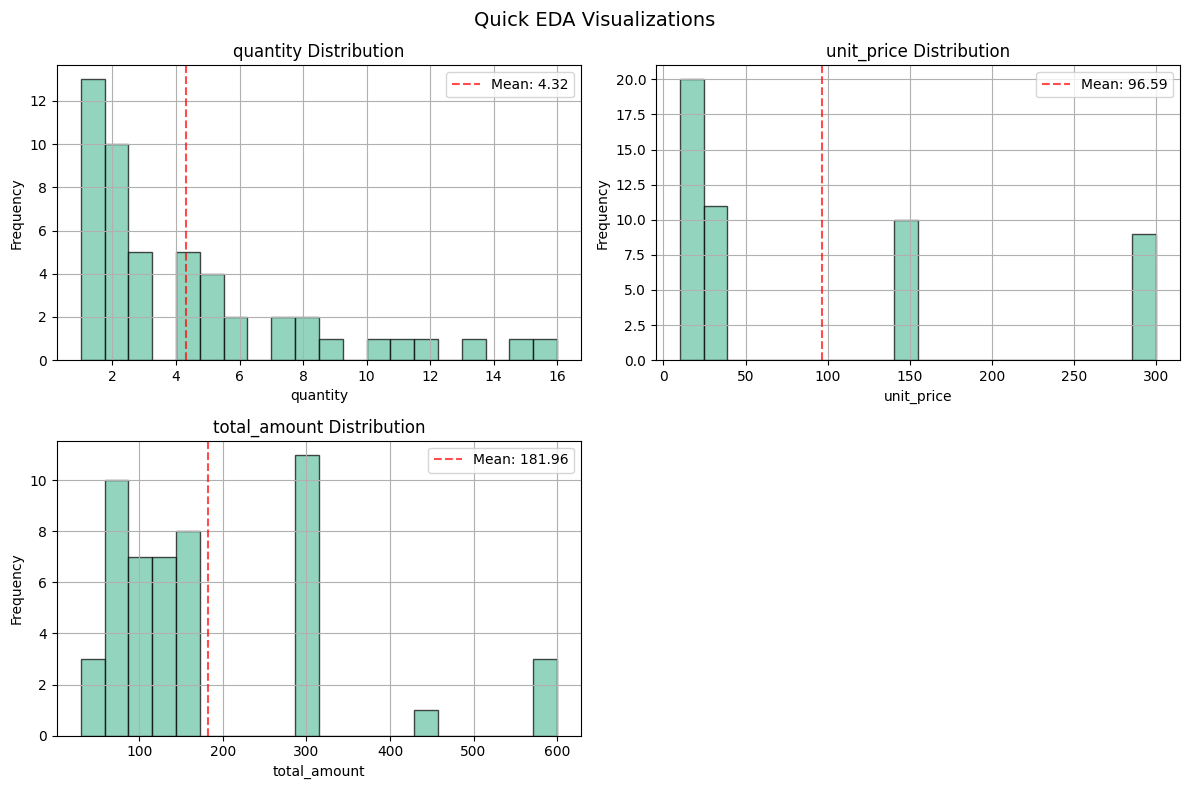

In [7]:
# Quick visualization function
def quick_viz(df, max_cols=4):
    """Generate quick visualizations for EDA."""
    numeric_cols = df.select_dtypes(include=[np.number]).columns[:max_cols]
    
    if len(numeric_cols) == 0:
        print("❌ No numeric columns for visualization")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Quick EDA Visualizations', fontsize=14)
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i >= 4:
            break
        
        ax = axes[i]
        
        # Histogram with KDE
        df[col].hist(ax=ax, bins=20, alpha=0.7, edgecolor='black')
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        
        # Add statistics text
        mean_val = df[col].mean()
        std_val = df[col].std()
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        ax.legend()
    
    # Hide unused subplots
    for i in range(len(numeric_cols), 4):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Generate quick visualizations
if 'sales_df' in locals() and sales_df is not None:
    quick_viz(sales_df)
else:
    print("❌ No data available for visualization")

## 🔍 Data Quality Assessment

Comprehensive data quality analysis.

In [8]:
# Data quality assessment (like datainfo() function)
def data_quality_report(df, name="Dataset"):
    """Comprehensive data quality assessment."""
    print(f"🔍 Data Quality Report: {name}")
    print("=" * 50)
    
    # Basic info
    print(f"📏 Dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types
    print(f"\n🏷️  Data Types:")
    type_counts = df.dtypes.value_counts()
    for dtype, count in type_counts.items():
        print(f"  {dtype}: {count} columns")
    
    # Missing data analysis
    print(f"\n❓ Missing Data Analysis:")
    missing_data = df.isnull().sum()
    missing_pct = (missing_data / len(df)) * 100
    
    has_missing = missing_data[missing_data > 0]
    if len(has_missing) > 0:
        print("  Columns with missing data:")
        for col, missing_count in has_missing.items():
            pct = missing_pct[col]
            print(f"    {col}: {missing_count} ({pct:.1f}%)")
    else:
        print("  ✅ No missing data found")
    
    # Duplicate analysis
    duplicate_count = df.duplicated().sum()
    duplicate_pct = (duplicate_count / len(df)) * 100
    print(f"\n🔁 Duplicates: {duplicate_count} ({duplicate_pct:.1f}%)")
    
    # Unique value analysis
    print(f"\n🎯 Uniqueness Analysis:")
    for col in df.columns:
        unique_count = df[col].nunique()
        unique_pct = (unique_count / len(df)) * 100
        
        if unique_count == len(df):
            status = "🔑 Unique identifier"
        elif unique_count == 1:
            status = "⚠️  Constant value"
        elif unique_count < 10:
            status = "📊 Categorical"
        elif unique_pct > 95:
            status = "🔢 High cardinality"
        else:
            status = "📈 Normal distribution"
        
        print(f"  {col}: {unique_count:,} unique ({unique_pct:.1f}%) - {status}")
    
    # Data quality score
    quality_score = 100
    if duplicate_count > 0:
        quality_score -= min(duplicate_pct * 2, 20)  # Max 20 point deduction
    
    missing_penalty = min(missing_pct.max() * 1.5, 30)  # Max 30 point deduction
    quality_score -= missing_penalty
    
    print(f"\n🏆 Data Quality Score: {quality_score:.1f}/100")
    
    if quality_score >= 90:
        print("   ✅ Excellent data quality")
    elif quality_score >= 75:
        print("   ⚠️  Good data quality with minor issues")
    elif quality_score >= 50:
        print("   🔧 Fair data quality - needs attention")
    else:
        print("   🚨 Poor data quality - significant issues")
    
    return {
        'shape': df.shape,
        'missing_data': missing_data.to_dict(),
        'duplicates': duplicate_count,
        'quality_score': quality_score
    }

# Run data quality assessment
if 'sales_df' in locals() and sales_df is not None:
    quality_report = data_quality_report(sales_df, "Sales Transactions")
else:
    print("❌ No data available for quality assessment")

🔍 Data Quality Report: Sales Transactions
📏 Dimensions: 50 rows × 10 columns
💾 Memory usage: 0.02 MB

🏷️  Data Types:
  object: 7 columns
  float64: 2 columns
  int64: 1 columns

❓ Missing Data Analysis:
  ✅ No missing data found

🔁 Duplicates: 0 (0.0%)

🎯 Uniqueness Analysis:
  transaction_id: 50 unique (100.0%) - 🔑 Unique identifier
  date: 25 unique (50.0%) - 📈 Normal distribution
  product_id: 5 unique (10.0%) - 📊 Categorical
  customer_id: 50 unique (100.0%) - 🔑 Unique identifier
  quantity: 15 unique (30.0%) - 📈 Normal distribution
  unit_price: 5 unique (10.0%) - 📊 Categorical
  total_amount: 27 unique (54.0%) - 📈 Normal distribution
  region: 4 unique (8.0%) - 📊 Categorical
  sales_rep: 4 unique (8.0%) - 📊 Categorical
  channel: 3 unique (6.0%) - 📊 Categorical

🏆 Data Quality Score: 100.0/100
   ✅ Excellent data quality


## 🚀 Cross-Window Testing

Test integration with other tmux layout windows.

In [9]:
# Cross-window integration test
print("🔗 Cross-Window Integration Test")
print("=" * 40)

# 1. Test database connection (Shell/REPL window integration)
print("1️⃣ Testing database connection:")
try:
    conn = duckdb.connect('sales_analysis.duckdb')
    tables = conn.execute("SHOW TABLES").fetchall()
    if tables:
        print(f"   ✅ Connected to database with {len(tables)} tables")
        for table in tables:
            count = conn.execute(f"SELECT COUNT(*) FROM {table[0]}").fetchone()[0]
            print(f"      • {table[0]}: {count:,} rows")
    else:
        print("   ⚠️  Database exists but no tables found")
        print("   💡 Run data_ingestion.py in Shell window first")
    conn.close()
except Exception as e:
    print(f"   ❌ Database connection failed: {e}")
    print("   💡 Create database using scripts/data_ingestion.py")

# 2. Test file accessibility (Data window integration)
print("\n2️⃣ Testing file accessibility:")
test_files = [
    '../data/sales.csv',
    '../data/products.json',
    '../data/regions.parquet',
    '../scripts/test_functions.py'
]

for file_path in test_files:
    if Path(file_path).exists():
        size = Path(file_path).stat().st_size / 1024
        print(f"   ✅ {Path(file_path).name}: {size:.1f} KB")
    else:
        print(f"   ❌ {Path(file_path).name}: Not found")

# 3. Test function imports (REPL window integration)
print("\n3️⃣ Testing function imports:")
try:
    import sys
    sys.path.append('../scripts')
    
    from test_functions import validate_transaction_data, calculate_profit_metrics
    print("   ✅ Successfully imported test functions")
    
    # Test a function
    test_result = calculate_profit_metrics(100, 60, 2)
    print(f"   ✅ Function test successful: profit = ${test_result['total_profit']}")
    
except Exception as e:
    print(f"   ❌ Function import failed: {e}")

# 4. Test data export (Editor window integration)
print("\n4️⃣ Testing data export:")
if 'sales_df' in locals() and sales_df is not None:
    try:
        # Export sample for Editor window
        sample_df = sales_df.head(10)
        sample_df.to_csv('../data/eda_sample_export.csv', index=False)
        print("   ✅ Sample data exported to eda_sample_export.csv")
        print("   💡 Use 'fdata' in Data window to find this file")
    except Exception as e:
        print(f"   ❌ Export failed: {e}")
else:
    print("   ⚠️  No data available for export")

print("\n🎯 Integration Test Summary:")
print("   • Database: Ready for REPL SQL queries")
print("   • Files: Available for Data window exploration")
print("   • Functions: Ready for REPL quick testing")
print("   • Exports: Available for Editor window analysis")

🔗 Cross-Window Integration Test
1️⃣ Testing database connection:
   ⚠️  Database exists but no tables found
   💡 Run data_ingestion.py in Shell window first

2️⃣ Testing file accessibility:
   ✅ sales.csv: 3.9 KB
   ✅ products.json: 6.9 KB
   ✅ regions.parquet: 4.5 KB
   ✅ test_functions.py: 15.0 KB

3️⃣ Testing function imports:
   ✅ Successfully imported test functions
   ✅ Function test successful: profit = $80

4️⃣ Testing data export:
   ✅ Sample data exported to eda_sample_export.csv
   💡 Use 'fdata' in Data window to find this file

🎯 Integration Test Summary:
   • Database: Ready for REPL SQL queries
   • Files: Available for Data window exploration
   • Functions: Ready for REPL quick testing
   • Exports: Available for Editor window analysis


## 📋 EDA Summary

Summary of findings and next steps.

In [10]:
# EDA Summary and recommendations
print("📋 EDA Summary Report")
print("=" * 50)

if 'sales_df' in locals() and sales_df is not None:
    print(f"📊 Dataset: Sales Transactions")
    print(f"   Records: {len(sales_df):,}")
    print(f"   Columns: {len(sales_df.columns)}")
    print(f"   Date range: {sales_df['date'].min()} to {sales_df['date'].max()}")
    print(f"   Revenue: ${sales_df['total_amount'].sum():,.2f}")
    
    # Key findings
    print(f"\n🔍 Key Findings:")
    print(f"   • Average transaction: ${sales_df['total_amount'].mean():.2f}")
    print(f"   • Largest transaction: ${sales_df['total_amount'].max():.2f}")
    print(f"   • Most active region: {sales_df['region'].value_counts().index[0]}")
    print(f"   • Most popular channel: {sales_df['channel'].value_counts().index[0]}")
    print(f"   • Unique customers: {sales_df['customer_id'].nunique():,}")
    print(f"   • Unique products: {sales_df['product_id'].nunique()}")

print(f"\n🚀 Next Steps for Tmux Layout Testing:")
print(f"   1️⃣ Data Window: Use 'fdata' to explore exported files")
print(f"   2️⃣ REPL Window: Test quickload() and quicktest() functions")
print(f"   3️⃣ Shell Window: Run data_ingestion.py if database missing")
print(f"   4️⃣ Editor Window: Edit and test analysis scripts")
print(f"   5️⃣ Jupyter Window: Run Sales_Analysis.ipynb for full analysis")

print(f"\n💡 EDA Functions Tested:")
print(f"   ✅ quick_profile() - Data overview")
print(f"   ✅ benchmark_loading() - Performance comparison")
print(f"   ✅ explore_json() - JSON structure analysis")
print(f"   ✅ quick_stats() - Statistical overview")
print(f"   ✅ data_quality_report() - Quality assessment")
print(f"   ✅ Cross-window integration tests")

print(f"\n🎉 EDA Complete! Ready for advanced analysis.")

📋 EDA Summary Report
📊 Dataset: Sales Transactions
   Records: 50
   Columns: 10
   Date range: 2024-01-15 to 2024-02-10
   Revenue: $9,097.84

🔍 Key Findings:
   • Average transaction: $181.96
   • Largest transaction: $599.98
   • Most active region: North
   • Most popular channel: online
   • Unique customers: 50
   • Unique products: 5

🚀 Next Steps for Tmux Layout Testing:
   1️⃣ Data Window: Use 'fdata' to explore exported files
   2️⃣ REPL Window: Test quickload() and quicktest() functions
   3️⃣ Shell Window: Run data_ingestion.py if database missing
   4️⃣ Editor Window: Edit and test analysis scripts
   5️⃣ Jupyter Window: Run Sales_Analysis.ipynb for full analysis

💡 EDA Functions Tested:
   ✅ quick_profile() - Data overview
   ✅ benchmark_loading() - Performance comparison
   ✅ explore_json() - JSON structure analysis
   ✅ quick_stats() - Statistical overview
   ✅ data_quality_report() - Quality assessment
   ✅ Cross-window integration tests

🎉 EDA Complete! Ready for adva